# 🎓 Student Score Performance  
### *Notes prepared by Muhammad Anas*

---

## 📌 Dataset Source  
Kaggle Dataset:  
https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data  

---

## 📘 Column Descriptions

| Column | Meaning |
|--------|---------|
| **Hours Studied** | Total hours a student studies per day. |
| **Previous Scores** | Marks obtained in the last exam. |
| **Extracurricular Activities** | Whether the student participates in activities outside academics (Yes/No). |
| **Sleep Hours** | Daily average sleep duration. |
| **Sample Question Papers Practiced** | Number of sample papers attempted. |
| **Performance Index** | Final calculated performance score (Target variable). |

---




---

In [48]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')


In [49]:
#loading the dataset
df=pd.read_csv('D:\DATA_SCIENCE_PROJECTS\DATASETS\Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# EDA

---

In [50]:
#checking the shape of the dataset
shape=df.shape
print(f"The shape of the dataset is: {shape}")


The shape of the dataset is: (10000, 6)


In [51]:
#checking the nulls values 
df.isnull().sum().sort_values(ascending=False)


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [52]:
#cheking the info and the datatypes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [53]:
#checking the descriptive statistics of the dataset
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [54]:
df.groupby('Hours Studied')['Performance Index'].mean()


Hours Studied
1    44.116319
2    46.428571
3    49.776586
4    52.719816
5    55.516453
6    58.486320
7    60.233835
8    64.211397
9    65.725561
Name: Performance Index, dtype: float64

In [55]:
df.groupby('Sample Question Papers Practiced')['Performance Index'].mean()

Sample Question Papers Practiced
0    52.946372
1    54.606339
2    55.264516
3    55.257005
4    54.148691
5    55.451362
6    56.147309
7    55.776089
8    55.454191
9    56.880114
Name: Performance Index, dtype: float64

### Correlation 


In [56]:
#checking the correlation between the features
Quntitative_features=['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']
df[Quntitative_features].corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
Hours Studied,1.000000,-0.012390,0.001245,0.017463
Previous Scores,-0.012390,1.000000,0.005944,0.007888
Sleep Hours,0.001245,0.005944,1.000000,0.003990
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000


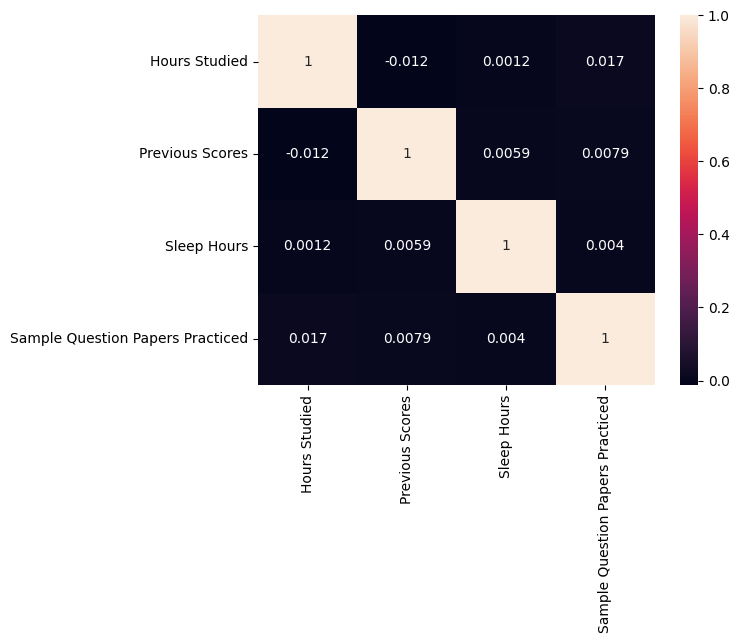

In [57]:
#making corealiton  matrix
sns.heatmap(df[Quntitative_features].corr(),annot=True)
plt.show()

* Droping the Extracurricular Activities column 

In [58]:
#drop the unnecessary columns
df.drop(['Extracurricular Activities'],axis=1,inplace=True)
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


## ploting scatterplot and kdeplot to check the realtionship 

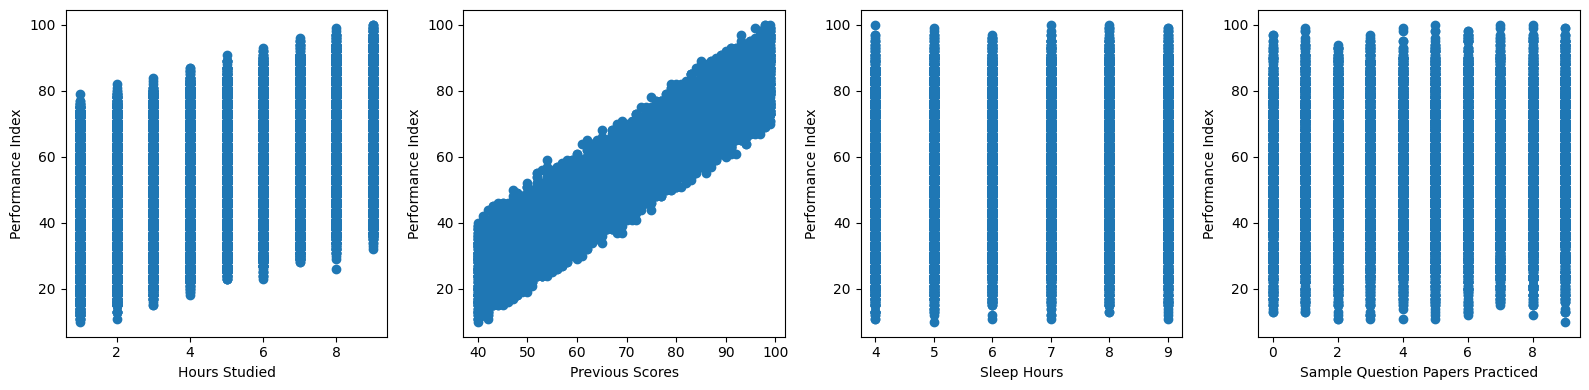

In [59]:
import matplotlib.pyplot as plt

features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

plt.figure(figsize=(16,4))

for i, col in enumerate(features, 1):
    plt.subplot(1, 4, i)
    plt.scatter(df[col], df['Performance Index'])
    plt.xlabel(col)
    plt.ylabel('Performance Index')

plt.tight_layout()
plt.show()


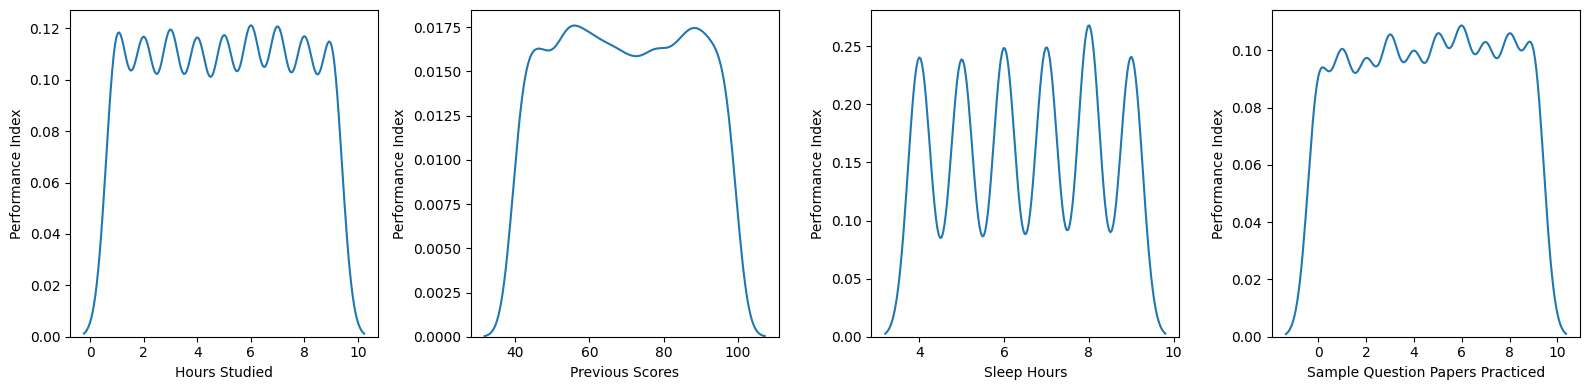

In [60]:
features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

plt.figure(figsize=(16,4))

for i, col in enumerate(features, 1):
    plt.subplot(1, 4, i)
    sns.kdeplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Performance Index')

plt.tight_layout()
plt.show()


### Preprocessing 
* we will use the yeo_johnson methode to  normalize the data 

* using the power_transformer to apply the yeo_johnson on the x or input variables 

In [61]:
from sklearn.preprocessing import PowerTransformer
pt_X = PowerTransformer(method='yeo-johnson', standardize=False)
X_trans = pt_X.fit_transform(df[Quntitative_features])
X_trans_df = pd.DataFrame(X_trans, columns=Quntitative_features)
X_trans_df.head()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,4.889874,38.547326,6.968474,0.911413
1,3.069639,33.451201,3.386115,1.713345
2,5.452815,23.346771,5.583242,1.713345
3,3.702573,23.694278,4.138127,1.713345
4,4.889874,31.273403,6.282311,3.806666


* using the power_transformer to apply the yeo_johnson on the y or output variables 

In [62]:
pt_y = PowerTransformer(method='yeo-johnson', standardize=False)
y_trans = pt_y.fit_transform(df[['Performance Index']])
y_trans_df = pd.DataFrame(y_trans, columns=['Performance Index'])
y_trans_df.head()

,Performance Index
0,54.989907
1,41.084533
2,29.845558
3,24.568904
4,41.632321


* Inverse tranformation for the y 

In [63]:
y_trans_df = pd.DataFrame(y_trans, columns=['Performance Index'])
y_trans_df.head()


,Performance Index
0,54.989907
1,41.084533
2,29.845558
3,24.568904
4,41.632321


* checking the distribution of data by using the kdeplot after the appling yeo_johnson

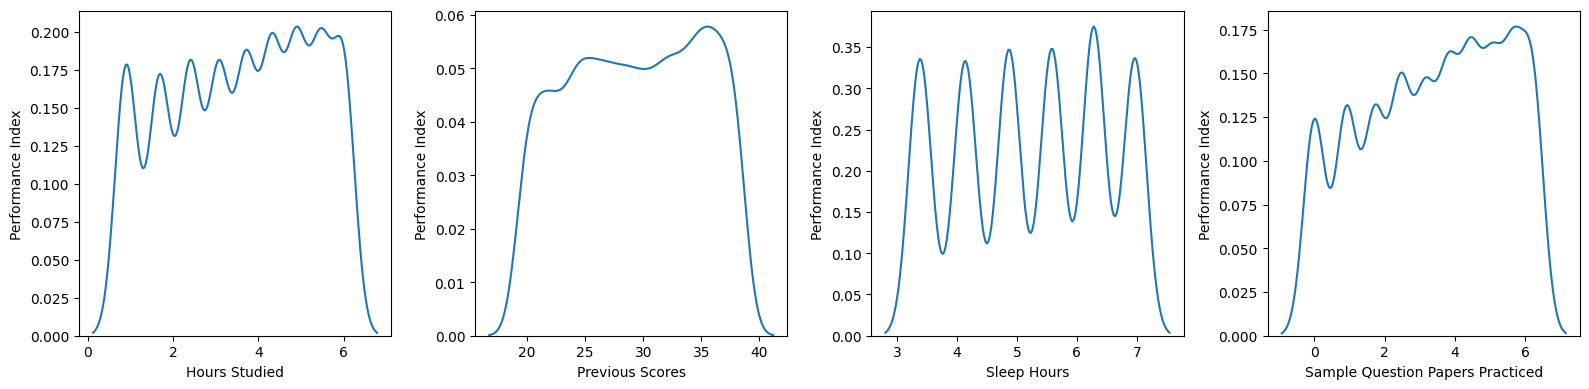

In [64]:
features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

plt.figure(figsize=(16,4))

for i, col in enumerate(features, 1):
    plt.subplot(1, 4, i)
    sns.kdeplot(X_trans_df[col])
    plt.xlabel(col)
    plt.ylabel('Performance Index')

plt.tight_layout()
plt.show()


## Model Training 


In [65]:
#spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_trans_df,y_trans_df,test_size=0.2,random_state=0)

In [66]:
#training the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
#checking the score of model 
model.score(x_test,y_test)

0.9870131742848701

* checking the score of model by using different metrics 


In [68]:
#checking the score of model uisng the metrics
from sklearn.metrics import r2_score,root_mean_squared_error,mean_squared_error
y_pred=model.predict(x_test)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"The R² score of the model is: {r2}")
print(f"The RMSE of the model is: {rmse}")
print(f"The MSE of the model is: {mse}")

The R² score of the model is: 0.9870131742848701
The RMSE of the model is: 1.1939961894294493
The MSE of the model is: 1.4256269003720452


In [69]:
y_pred_trans = model.predict(x_test)
y_pred = pt_y.inverse_transform(y_pred_trans)
y_test_original = pt_y.inverse_transform(y_test)
y_test_original

array([[53.],
       [50.],
       [80.],
       ...,
       [66.],
       [27.],
       [21.]])

* Making in function for the user to predict output 

In [70]:
def predict_user_input(user_input_dict, pt_x, pt_y, model):
    import pandas as pd
    import numpy as np

    # Convert dict to DataFrame
    user_df = pd.DataFrame([user_input_dict])

    # Step 1: Transform X using fitted PowerTransformer
    user_trans = pt_x.transform(user_df)

    # Step 2: Predict (on transformed scale)
    y_pred_trans = model.predict(user_trans).reshape(-1, 1)

    # Step 3: Convert back to original scale
    y_pred_original = pt_y.inverse_transform(y_pred_trans)

    return y_pred_original[0][0]
# Take input from user
hours = float(input("Enter Hours Studied: "))
previous_scores = float(input("Enter Previous Scores: "))
sleep_hours = float(input("Enter Sleep Hours: "))
sample_papers = float(input("Enter Sample Question Papers Practiced: "))

# Combine into dict (correct keys + correct variables)
user_values = {
    "Hours Studied": hours,
    "Previous Scores": previous_scores,
    "Sleep Hours": sleep_hours,
    "Sample Question Papers Practiced": sample_papers
}


# Predict
final_prediction = predict_user_input(user_values, pt_X, pt_y, model)
print("Predicted Output (Original Scale):", final_prediction)



Predicted Output (Original Scale): 91.7759576088488


* Plotting the actual vs predicted

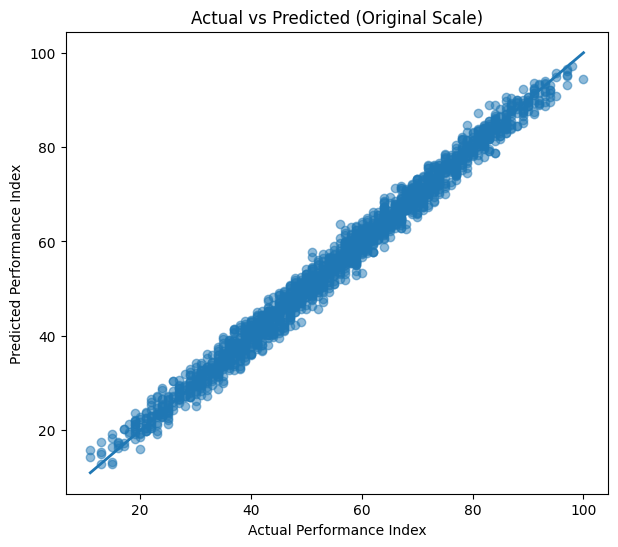

In [71]:
# y_test_original and y_pred are already inverse-transformed (original scale)
plt.figure(figsize=(7,6))
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         linewidth=2)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted (Original Scale)")
plt.show()


## Saved the model 

In [72]:
pickle.dump(model,open('D:\DATA_SCIENCE_PROJECTS\Ml_Algorathims\Saved_Ml_Models\multiple_linear_regression_model.pkl','wb'))